<a href="https://colab.research.google.com/github/wdconinc/practical-computing-for-scientists/blob/master/Lectures/lecture05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture #05

#Introduction to Python - IV

In [0]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

##In our last episode: 

* `for` and `while` loops
* `break` and `continue`
* the mighty `zip` function
* `letter_grade2` exercise
* A bit about tuples

###Tuples

* An _immutable_ list 
* The meaning of each each element is determined by its position. The elements may have all the same type or different types.
* Contents can be unpacked into individual variables.
 
Example:

In [0]:
date = (2018, 9, 10, 12, 0, 0, 'EDT')
print(date)
print(date[0])
year, month, day, hour, minute, sec, tz = date
print(year, tz)

(2018, 9, 10, 12, 0, 0, 'EDT')
2018
2018 EDT


##Dictionaries

Dictionaries function as databases or lookup tables. They are collections whose elements are `key,value` pairs:

In [0]:
prices = {'apple': 0.75, 'carrot': 0.5, 'truffle': 10.00}
print(prices)
carrot_price = prices['carrot']
print(carrot_price)
print(prices['apple'])
prices['banana'] = 1.0
print(prices['banana'])

{'apple': 0.75, 'carrot': 0.5, 'truffle': 10.0}
0.5
0.75
1.0


You can add and remove elements from dictionaries. Like lists, they are _mutable_:

In [0]:
prices['steak'] = 5.00
print(prices)
print(prices['steak'])
steak_price = prices.pop('steak')
print(steak_price)
print(prices)

{'apple': 0.75, 'carrot': 0.5, 'truffle': 10.0, 'banana': 1.0, 'steak': 5.0}
5.0
5.0
{'apple': 0.75, 'carrot': 0.5, 'truffle': 10.0, 'banana': 1.0}


In [0]:
carrot_prices = prices.pop('carrot')
x = prices.pop('apple')

KeyError: ignored

In [0]:
print(prices)

{'truffle': 10.0, 'banana': 1.0}


In [0]:
prices.pop('banana')

1.0

In [0]:
prices['pizza'] = 4.2

In [0]:
prices

{'pizza': 4.2, 'truffle': 10.0}

Dictionaries are indexed by their keys, and are not ordered, so slicing doesn't work.

You can loop over a dictionary like so:

In [0]:
for item in prices:
    print(item)

for item, price in prices.items():
    print(item, "costs $", price)

truffle
pizza
truffle costs $ 10.0
pizza costs $ 4.2


##More on functions

###Multiple return values

Functions can return multiple arguments, in a tuple:

In [0]:
def multi(x,y):
    return x/y, x*y, x**y

rval = multi(2.0, 4.0)
print(type(rval), rval)

div, mult, power = rval
print(div, mult, power)

div, mult, power = multi(3.0, 4.0)
print(div, mult, power)

<class 'tuple'> (0.5, 8.0, 16.0)
0.5 8.0 16.0
0.75 12.0 81.0


In [0]:
div, mult, _ = multi(3.0, 4.0)

###Default arguments

We can specify the default values for function arguments:

In [0]:
def darg(x, y = 2, z = 3):
    print('x =', x, ', y =', y, ', z =', z)
    return x**y + z

Then we call the function with _positional arguments_, in which the variables used inside the function `x,y,z` are assigned to the arguments based on the position.

In [0]:
print(darg(2))
print(darg(2, 3))
print(darg(2, 3, 2))

x = 2 , y = 2 , z = 3
7
x = 2 , y = 3 , z = 3
11
x = 2 , y = 3 , z = 2
10


We can also specify _keyword arguments_, making explicit which variable in the function is to be associated with which argument:

In [0]:
print(darg(x = 2, y = 3, z = 4))

x = 2 , y = 3 , z = 4
12


The order doesn't matter so long as you either use all keyword arguments or specify any positional arguments first:

In [0]:
print(darg(y = 5, x = 2, z = 4))

x = 2 , y = 5 , z = 4
36


But, you can't use a keyword argument followed by a positional argument:

In [0]:
print(darg(2, z = 5)) # keyword after positional is OK

x = 2 , y = 2 , z = 5
9


In [0]:
print(darg(z = 5, 2)) # positional after keyword is NOT OK

SyntaxError: ignored

###Formal and informal arguments

Python functions actually take two types of arguments:
* **Formal arguments** are a those that explicitly appear in the function definition.
* **Informal arguments** are any extra arguments passed into the function by the caller.
 * ** \*foo ** in the function indicates it accepts informal positional arguments
 * ** \*\*bar ** in the function indicates it accepts informal keyword arguments
 * By tradition we use \*args and \*\*kwargs

In [0]:
def fvar(x, y, z=1, *args, **kwargs):
    print("Formal arguments:", "x = ", x, ", y = ", y, ", z = ", z)
    print("Informal positional arguments (*args):", args)
    print("Informal keyword arguments (**kwargs):", kwargs)

In [0]:
fvar(1, 2)
fvar(1, 2, 3)

Formal arguments: x =  1 , y =  2 , z =  1
Informal positional arguments (*args): ()
Informal keyword arguments (**kwargs): {}
Formal arguments: x =  1 , y =  2 , z =  3
Informal positional arguments (*args): ()
Informal keyword arguments (**kwargs): {}


Now we can specify additional _informal_ positional arguments. The function requires 3 _formal_ arguments. Let's add 2 more positional arguments:

In [0]:
fvar(1, 2, 3, 4, 5)

Formal arguments: x =  1 , y =  2 , z =  3
Informal positional arguments (*args): (4, 5)
Informal keyword arguments (**kwargs): {}


Now, let's specify some of the formal arguments with keyword notation and add an additional informal keyword argument `J`:

In [0]:
fvar(1, 2, 3, 4, J = 10)

Formal arguments: x =  1 , y =  2 , z =  3
Informal positional arguments (*args): (4,)
Informal keyword arguments (**kwargs): {'J': 10}


Note: Specifying formal arguments with keyword notation does not make them informal keyword arguments.

###Arggg! Why are you killing me with all this arg stuff?!

The `matplotlib` functions make extensive use of \*args and \*\*kwargs:

In [0]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi

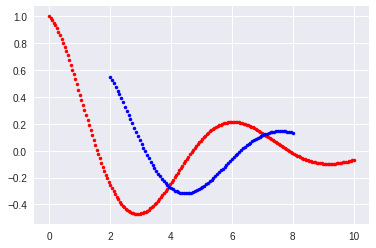

In [0]:
f1 = lambda z: sp.exp(-z/4)*sp.cos(z)
x1 = np.linspace(0,10,200)
f2 = lambda z: sp.exp(-z/4)*sp.sin(z)
x2 = np.linspace(2,8,100)
plt.plot(x1, f1(x1), '.r', x2, f2(x2), '.b')

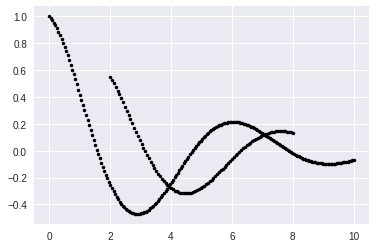

In [0]:
plt.plot(x1, f1(x1), '.r', x2, f2(x2), '.b', color = 'black')

###Lambda functions

Lambda functions are short, single expression functions, refered to with a variable. They are _syntactic sugar_ and could always be replaced with regular functions.

In [0]:
f1 = lambda z: sp.exp(-z/4) * sp.cos(z)
f2 = lambda z: print("value = ", z)
print(f1(0))
f2("hello")

1.0
value =  hello


##Simple data entry suggestions

In [0]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

**Example**: data from the second homework assignment

** My suggestion**: Use a list of tuples
* Each entry in the tuple has a specific meaning
* Lists store homogeneous data
* Human readable data structure, a bit like a spreadsheet

_For large datasets we will want to read in from a file. A topic for later._

In [0]:
# data   Va(V), I(A), R(cm), L(cm)
raw_data = [(275, 1.30, 4.1, 3.1),
            (275, 1.20, 4.7, 3.7),
            (275, 1.10, 5.3, 4.0),
            (275, 1.40, 3.7, 3.3),
            (275, 1.50, 3.3, 2.9),
            (285, 1.50, 3.5, 2.8),
            (285, 1.40, 3.7, 3.0),
            (285, 1.30, 4.2, 3.4),
            (285, 1.20, 4.6, 3.9),
            (285, 1.10, 4.9, 4.2)]

In [0]:
print(raw_data)

[(275, 1.3, 4.1, 3.1), (275, 1.2, 4.7, 3.7), (275, 1.1, 5.3, 4.0), (275, 1.4, 3.7, 3.3), (275, 1.5, 3.3, 2.9), (285, 1.5, 3.5, 2.8), (285, 1.4, 3.7, 3.0), (285, 1.3, 4.2, 3.4), (285, 1.2, 4.6, 3.9), (285, 1.1, 4.9, 4.2)]


### How do we work with it? ###

Best idea is to convert into a numpy `ndarray`, like so:

In [0]:
K = [1, 2]
L = [3, 4]
K + L 

[1, 2, 3, 4]

In [0]:
data = np.asarray(raw_data)
print(type(data))
print(data)
print(data[0,1]) # row, column
print(data[0:2,1])

<class 'numpy.ndarray'>
[[275.    1.3   4.1   3.1]
 [275.    1.2   4.7   3.7]
 [275.    1.1   5.3   4. ]
 [275.    1.4   3.7   3.3]
 [275.    1.5   3.3   2.9]
 [285.    1.5   3.5   2.8]
 [285.    1.4   3.7   3. ]
 [285.    1.3   4.2   3.4]
 [285.    1.2   4.6   3.9]
 [285.    1.1   4.9   4.2]]
1.3
[1.3 1.2]


### Getting 1D arrays ###

In [0]:
V = data[:,0]
print(V)
I = data[:,1]
R = data[:,2]
L = data[:,3]
print(V, I, R, L)

[275. 275. 275. 275. 275. 285. 285. 285. 285. 285.]
[275. 275. 275. 275. 275. 285. 285. 285. 285. 285.] [1.3 1.2 1.1 1.4 1.5 1.5 1.4 1.3 1.2 1.1] [4.1 4.7 5.3 3.7 3.3 3.5 3.7 4.2 4.6 4.9] [3.1 3.7 4.  3.3 2.9 2.8 3.  3.4 3.9 4.2]


In [0]:
print(data)


[[275.    1.3   4.1   3.1]
 [275.    1.2   4.7   3.7]
 [275.    1.1   5.3   4. ]
 [275.    1.4   3.7   3.3]
 [275.    1.5   3.3   2.9]
 [285.    1.5   3.5   2.8]
 [285.    1.4   3.7   3. ]
 [285.    1.3   4.2   3.4]
 [285.    1.2   4.6   3.9]
 [285.    1.1   4.9   4.2]]


### Array arithmetic ###
Arithmetic operations, and many functions defined inside `numpy` work element by element.

In [0]:
print(R + L)
print(R * L)
print(R**2)
print(np.power(R, 1.0/2.0))

[7.2 8.4 9.3 7.  6.2 6.3 6.7 7.6 8.5 9.1]
[12.71 17.39 21.2  12.21  9.57  9.8  11.1  14.28 17.94 20.58]
[16.81 22.09 28.09 13.69 10.89 12.25 13.69 17.64 21.16 24.01]
[2.02484567 2.16794834 2.30217289 1.92353841 1.81659021 1.87082869
 1.92353841 2.04939015 2.14476106 2.21359436]


### Making a plot ###
In the e/m lab the voltage, current and radius of curvature are related:

$$ \frac{e}{m} \propto \frac{V^2}{I^2 r^2} $$

So, I could, for example, explore the data by plotting the right hand side vs $r^2$:

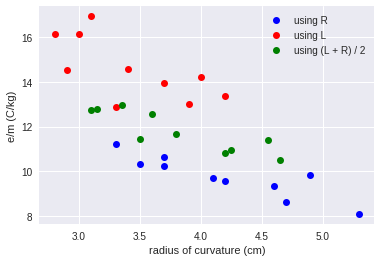

In [0]:
plt.plot(R, V / (I**2 * R**2), 'bo')
plt.plot(L, V / (I**2 * L**2), 'ro')
plt.plot((R + L) / 2.0, V / (I**2 * ((R + L) / 2.0)**2 ),'go')
plt.xlabel('radius of curvature (cm)')
plt.ylabel('e/m (C/kg)')
plt.legend(('using R', 'using L', 'using (L + R) / 2'), loc = 'upper right')

##Bits and Bytes

Before moving on let's talk about how integers are represented in decimal, binary and hex. 

* A `bit` = "binary digit" = 0 or 1. True or False.
* A `byte` = 8 bits. Has $2^8$ = 256 possible values
  * Written, in binary format as, e.g 0b00100110

prefix|bit8|bit7|bit6|bit5|bit4|bit3|bit2|bit1|
-------------------|--------------------
 0b| 128 | 64 |32 |16|8|4|2|1
  
  * Hexadecimal (base 16) format. Made of two 4 bit "nibbles" which are denoted by the numbers 0-9, and the letters A=10, B=11, C=12, D=14, E=14,F=15 

prefix|nibble 2 | nibble 1
---------|---------
0x | 16  | 1

  * Written as 0x##
  * So 0x10 = 16 in decimal. 0x21 = 37, etc
  
* An `int` = 4 bytes on a 32 bit system, 8 bytes on a 64 bit system 
* A `float` = at least 8 bytes

### Exercise: print binary and hex as decimal

Start by doing `help(int)`. There is a way to feed a character string such as '0b00100110' in to make an `int`. Figure out how to use that feature, make an integer variable and use `print` to print it (by default in decimal).

In [0]:
help(int)